In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# ForestFire DataSet

In [2]:
df= pd.read_csv('forestfires.csv')
df.head(6)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
#Data Description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


In [6]:
df.shape

(517, 31)

<Axes: xlabel='month', ylabel='count'>

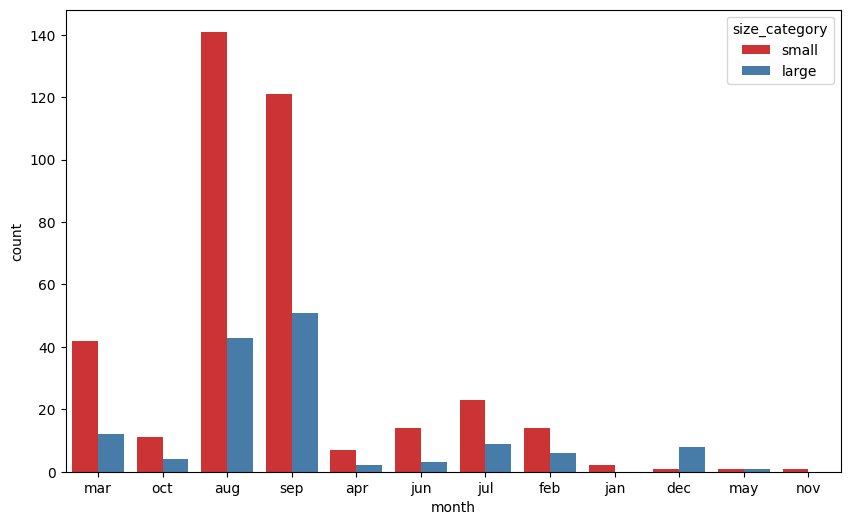

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'month', hue = 'size_category', data = df, palette='Set1')

<Axes: xlabel='day', ylabel='count'>

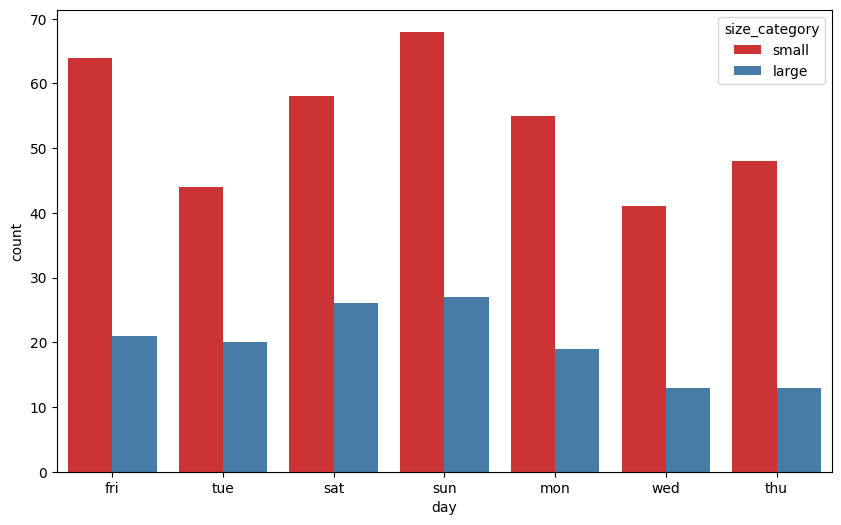

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'day', hue = 'size_category', data = df, palette='Set1')

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

df["month"] = le.fit_transform(df["month"])
df["day"] = le.fit_transform(df["day"])
df["size_category"] = le.fit_transform(df["size_category"])

In [11]:
df.head(6)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
x=df.iloc[:,:-1]
y=df['size_category']

In [13]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [15]:
sc = StandardScaler()

x=sc.fit_transform(x)
x

array([[ 2.84222252e-01, -1.42312073e+00, -8.05959472e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 9.70871338e-01,  1.17671466e+00, -8.10203395e-03, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [ 9.70871338e-01, -3.83186570e-01, -8.10203395e-03, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.08907592e+00,  1.36780508e-01, -1.64008316e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-1.08907592e+00, -3.83186570e-01,  6.80956663e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 7.41988309e-01,  1.17671466e+00, -2.02087875e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

# SVM Model

In [17]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.25, random_state=143)

In [18]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((387, 30), (387,), (130, 30), (130,))

In [19]:
svc= SVC(kernel='poly')

svc.fit(xtrain,ytrain)

ypred= svc.predict(xtest)

In [20]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.40      0.14      0.21        28
           1       0.80      0.94      0.86       102

    accuracy                           0.77       130
   macro avg       0.60      0.54      0.54       130
weighted avg       0.71      0.77      0.72       130



In [22]:
print(svc.score(xtrain, ytrain))
print(svc.score(xtest,ytest))

0.772609819121447
0.7692307692307693


# Improving Model by Grid Search CV

In [23]:
svc= SVC()

param= {
    'C':[0.1,0.001,0.0001,10],
    'kernel':["linear","rbf","poly"],
    'gamma':[0.1,0.001,1]
}

In [24]:
grid = GridSearchCV(SVC(), param_grid=param, refit = True, verbose = 3,  cv = 5)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.821 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.821 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.792 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.792 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.818 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.705 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.782 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 0.0001, 10],
                         'gamma': [0.1, 0.001, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [25]:
grid.best_estimator_

SVC(C=10, gamma=0.1, kernel='linear')

In [26]:
svc= SVC(C= 10, kernel='linear', gamma=0.1)

svc.fit(xtrain,ytrain)
ypred= svc.predict(xtest)

In [27]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.98      0.97      0.98       102

    accuracy                           0.96       130
   macro avg       0.94      0.95      0.94       130
weighted avg       0.96      0.96      0.96       130



In [28]:
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.9844961240310077
0.9615384615384616


# Salary dataset

In [29]:
train= pd.read_csv('SalaryData_Train(1).csv')
train.head(6)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [30]:
test= pd.read_csv('SalaryData_Test(1).csv')
test.head(6)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K


In [31]:
train.shape, test.shape

((30161, 14), (15060, 14))

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [34]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [35]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


<Axes: xlabel='Salary', ylabel='count'>

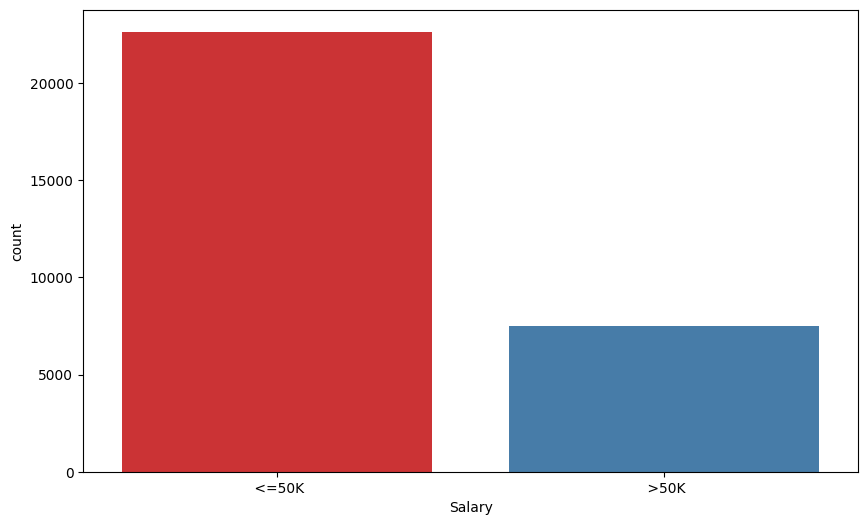

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x=train['Salary'], palette='Set1')

<Axes: xlabel='Salary', ylabel='count'>

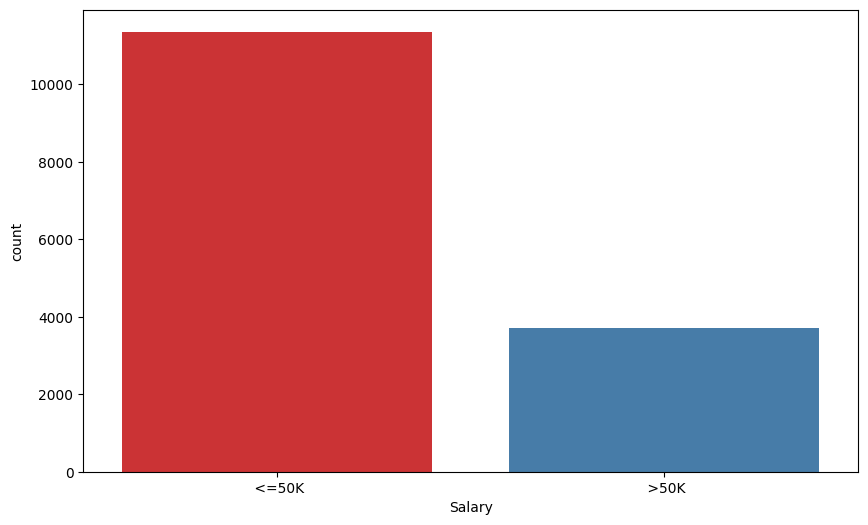

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x=test['Salary'], palette='Set1')

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le= LabelEncoder()

train["workclass"] = le.fit_transform(train["workclass"])
train["education"] = le.fit_transform(train["education"])
train["maritalstatus"] = le.fit_transform(train["maritalstatus"])
train["occupation"] = le.fit_transform(train["occupation"])
train["relationship"] = le.fit_transform(train["relationship"])
train["race"] = le.fit_transform(train["race"])
train["sex"] = le.fit_transform(train["sex"])
train["native"] = le.fit_transform(train["native"])
train["Salary"] = le.fit_transform(train["Salary"])

In [43]:
test["workclass"] = le.fit_transform(test["workclass"])
test["education"] = le.fit_transform(test["education"])
test["maritalstatus"] = le.fit_transform(test["maritalstatus"])
test["occupation"] = le.fit_transform(test["occupation"])
test["relationship"] = le.fit_transform(test["relationship"])
test["race"] = le.fit_transform(test["race"])
test["sex"] = le.fit_transform(test["sex"])
test["native"] = le.fit_transform(test["native"])
test["Salary"] = le.fit_transform(test["Salary"])

In [44]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [45]:
test.head(6)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
5,63,4,14,15,2,9,0,4,1,3103,0,32,37,1


In [46]:
train.shape, test.shape

((30161, 14), (15060, 14))

In [47]:
xtrain = train.iloc[:,:-1]
ytrain = train['Salary']

In [48]:
xtrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [49]:
ytrain

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int64

In [50]:
xtest = test.iloc[:,:-1]
ytest = test['Salary']

In [51]:
xtest

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [52]:
ytest

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int64

In [53]:
sc=StandardScaler()

xtrain=sc.fit_transform(xtrain)
xtrain

array([[ 0.04277892,  2.93594688, -0.34982703, ..., -0.21850808,
        -0.07773541,  0.26635842],
       [ 0.88026081,  1.88764517, -0.34982703, ..., -0.21850808,
        -2.33149486,  0.26635842],
       [-0.0333558 , -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       ...,
       [ 1.48933854, -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       [-1.25151126, -0.20895825,  0.1748048 , ..., -0.21850808,
        -1.74718685,  0.26635842],
       [ 1.03253024,  0.83934346,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842]])

In [54]:
xtest=sc.fit_transform(xtest)
xtest

array([[-1.02900513, -0.222347  , -2.42343884, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       [-0.05742253, -0.222347  ,  0.19017232, ..., -0.2191694 ,
         0.75013125,  0.26058067],
       [-0.80479376, -1.25712632, -0.85527215, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       ...,
       [-0.05742253, -0.222347  , -0.33254991, ..., -0.2191694 ,
         0.75013125,  0.26058067],
       [ 0.39100021, -0.222347  , -0.33254991, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       [-0.2816339 ,  0.81243231, -0.33254991, ..., -0.2191694 ,
         1.57915155,  0.26058067]])

# SVC Model

In [55]:
svc= SVC()
svc.fit(xtrain,ytrain)

ypred= svc.predict(xtest)

In [56]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.76      0.55      0.64      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.75      0.77     15060
weighted avg       0.84      0.85      0.84     15060



# Hyperparameter Tunning

In [57]:
svc= SVC()

param= {
    'C':[0.1],
    'kernel':["linear","poly"],
    'gamma':[0.1]
}

In [57]:
grid = GridSearchCV(SVC(), param_grid=param)
grid.fit(xtrain,ytrain)

In [58]:
grid.best_estimator_

SVC(C=10, gamma=0.1, kernel='linear')

In [59]:
svc= SVC(C= 0.1, kernel='poly', gamma=0.1)
svc.fit(xtrain,ytrain)

ypred= svc.predict(xtest)

In [60]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     11360
           1       0.79      0.44      0.57      3700

    accuracy                           0.83     15060
   macro avg       0.82      0.70      0.73     15060
weighted avg       0.83      0.83      0.82     15060



In [61]:
print(svc.score(xtrain, ytrain))
print(svc.score(xtest,ytest))

0.8348529558038527
0.8335989375830013
